In [1]:
# E-Commerce Delivery Prediction - Exploratory Analysis
# This notebook contains interactive data exploration

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print(" Libraries loaded successfully!")

 Libraries loaded successfully!


In [2]:
# Load the dataset
df = pd.read_csv('../data/e_commerce.csv')

print(f"Dataset shape: {df.shape}")
print(f"\nFirst 5 rows:")
df.head()

Dataset shape: (10999, 12)

First 5 rows:


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [3]:
# Display basic statistics
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


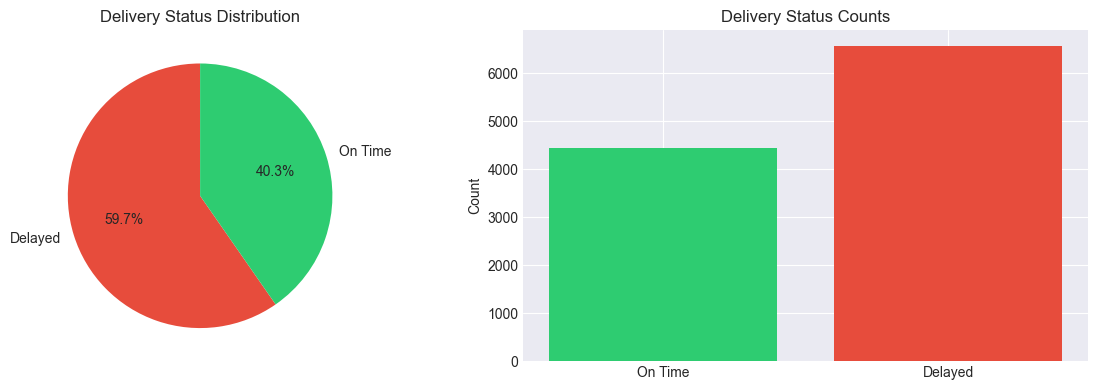


Delay Rate: 59.67%


In [5]:
# Traget Distribution
# Visualize target variable
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Pie chart
target_counts = df['Reached.on.Time_Y.N'].value_counts()
ax[0].pie(target_counts, labels=['Delayed', 'On Time'], autopct='%1.1f%%', 
          colors=['#e74c3c', '#2ecc71'], startangle=90)
ax[0].set_title('Delivery Status Distribution')

# Bar chart
ax[1].bar(['On Time', 'Delayed'], 
          [target_counts[0], target_counts[1]], 
          color=['#2ecc71', '#e74c3c'])
ax[1].set_ylabel('Count')
ax[1].set_title('Delivery Status Counts')

plt.tight_layout()
plt.show()

print(f"\nDelay Rate: {(df['Reached.on.Time_Y.N'].sum() / len(df)) * 100:.2f}%")

In [6]:
# Key Insights
# Compare delayed vs on-time orders
print("="*80)
print("KEY INSIGHTS")
print("="*80)

print("\n DISCOUNT ANALYSIS:")
print(f"On-time orders: {df[df['Reached.on.Time_Y.N']==0]['Discount_offered'].mean():.2f}% avg")
print(f"Delayed orders: {df[df['Reached.on.Time_Y.N']==1]['Discount_offered'].mean():.2f}% avg")

print("\n  WEIGHT ANALYSIS:")
print(f"On-time orders: {df[df['Reached.on.Time_Y.N']==0]['Weight_in_gms'].mean():.0f}g avg")
print(f"Delayed orders: {df[df['Reached.on.Time_Y.N']==1]['Weight_in_gms'].mean():.0f}g avg")

print("\n COST ANALYSIS:")
print(f"On-time orders: ${df[df['Reached.on.Time_Y.N']==0]['Cost_of_the_Product'].mean():.2f} avg")
print(f"Delayed orders: ${df[df['Reached.on.Time_Y.N']==1]['Cost_of_the_Product'].mean():.2f} avg")

KEY INSIGHTS

 DISCOUNT ANALYSIS:
On-time orders: 5.55% avg
Delayed orders: 18.66% avg

  WEIGHT ANALYSIS:
On-time orders: 4169g avg
Delayed orders: 3273g avg

 COST ANALYSIS:
On-time orders: $214.50 avg
Delayed orders: $207.29 avg
